# Student Performance Indicator


## Содержание
1. Постановка задачи
2. Сбор данных
3. Проверка данных
4. Предварительный анализ данных
5. Предварительная обработка данных
6. Обучение модели
7. Выбор наилучшей модели


## 1. Постановка задачи
Этот проект позволяет понять, как влияют на успеваемость учащегося (результаты тестов) такие переменные, как:
- Пол
- Этническая принадлежность
- Уровень образования родителей
- Обед
- Курс подготовки к тестированию

## 2. Cбор данных

- Источник данных - [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)  
- Данные состоят из 8 столбцов и 1000 строк.

###  2.1 Импорт данных и необходимых библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [7]:
df.shape

(1000, 8)

### 2.2  Информация о данных

- gender : sex of students -> (Male / female)
- race / ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free / reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Проверка данных

- Проверка пропущенных значений
- Проверька дубликатов
- Проверка типа данных
- Проверка количества уникальных значений в каждом столбце
- Проверка статистики набора данных
- Проверка различных категорий, присутствующих в разных категориальных столбцах

### 3.1 Проверка пропущенных значений

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Пропущенных значений нет**

### 3.2 Проверька дубликатов

In [10]:
df.duplicated().sum()

0

**Дубликатов нет**

### 3.3 Проверка типа данных

In [12]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### 3.4 Проверка количества уникальных значений в каждом столбце

In [17]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Проверка статистики данных

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Выводы**
- Из приведенного выше описания числовых данных следует, что все средние значения очень близки друг к другу - между 66 и 68,05;
- Все стандартные отклонения также близки - между 14,6 и 15,19;
- В то время как минимальный балл по математике равен 0, минимальный балл за письмо намного выше =10, а за чтение выше =17

### 3.6 Исследование данных

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
print("Categories in 'gender' variable:")
print(*df['gender'].unique(), sep=' | ')
print()

print("Categories in 'race_ethnicity' variable:")
print(*df['race_ethnicity'].unique(), sep=' | ')
print()

print("Categories in'parental level of education' variable:")
print(*df['parental_level_of_education'].unique(), sep=' | ')
print()

print("Categories in 'lunch' variable:")
print(*df['lunch'].unique(), sep=' | ')
print()

print("Categories in 'test preparation course' variable:")
print(*df['test_preparation_course'].unique(), sep=' | ')

Categories in 'gender' variable:
female | male

Categories in 'race_ethnicity' variable:
group B | group C | group A | group D | group E

Categories in'parental level of education' variable:
bachelor's degree | some college | master's degree | associate's degree | high school | some high school

Categories in 'lunch' variable:
standard | free/reduced

Categories in 'test preparation course' variable:
none | completed


In [42]:
# определим числовые и категориальные столбцы
numeric_features = list(df.select_dtypes(include=int).columns)
categorical_features = list(df.select_dtypes(include=object).columns)

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [43]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.7 Добавление столбцов общего балла - "total_score" и среднего балла - "average_score"

In [50]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [53]:
reading_full = len(df[df['reading_score'] == 100])
writing_full = len(df[df['writing_score'] == 100])
math_full = len(df[df['math_score'] == 100])

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [54]:
reading_less_20 = len(df[df['reading_score'] <= 20])
writing_less_20 = len(df[df['writing_score'] <= 20])
math_less_20 = len(df[df['math_score'] <= 20])

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Выводы**
- Исходя из приведенных выше значений, мы получаем, что учащиеся показали худшие результаты по математике
- Лучшая успеваемость в разделе чтение

## 4. Исследование данных (Визуализация)

### 4.1 Визуализация распределения средних баллов
- Гистограмма
- KDE

<Axes: xlabel='average_score', ylabel='Count'>

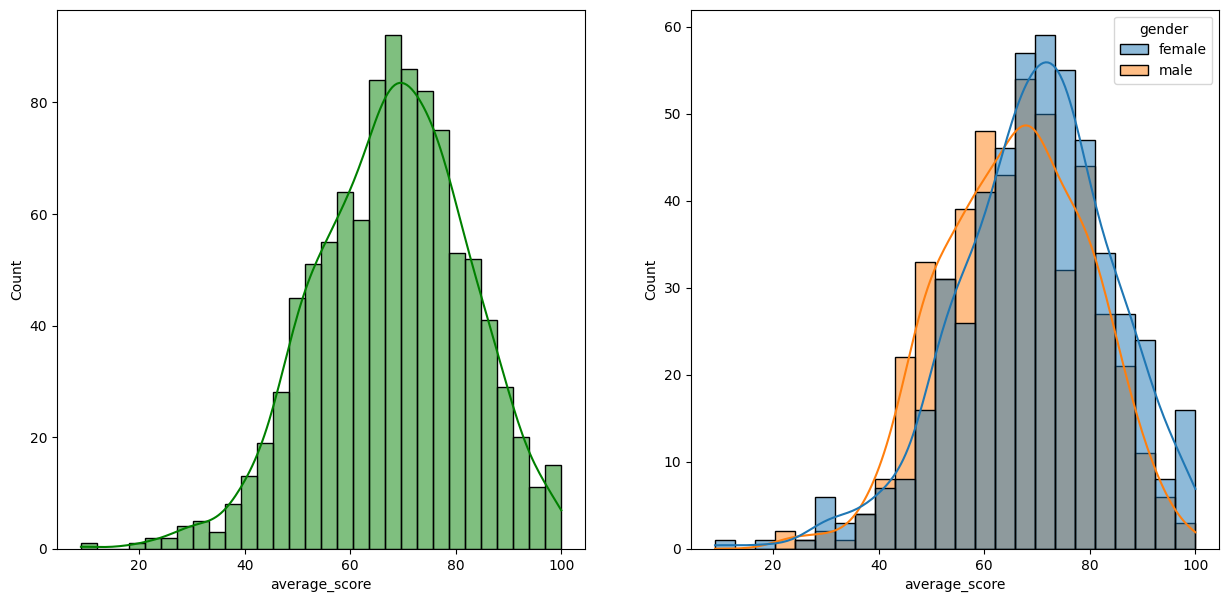

In [80]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g', ax=axs[0])
sns.histplot(data=df,x='average_score',kde=True,hue='gender', ax=axs[1])

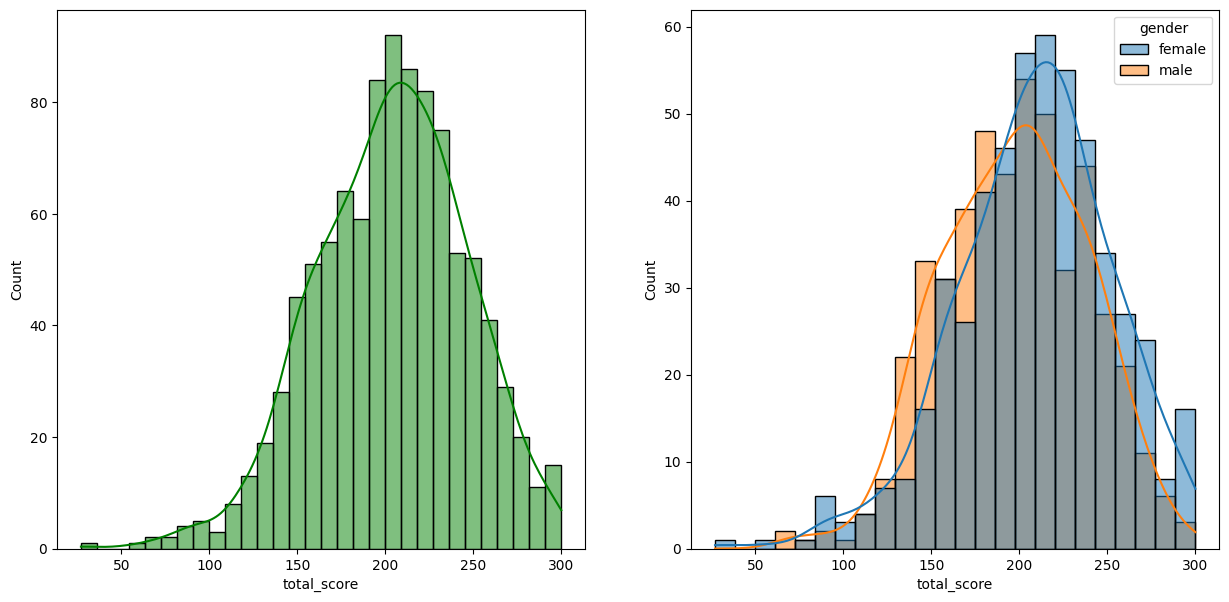

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g', ax=axs[0])
sns.histplot(data=df,x='total_score',kde=True,hue='gender', ax=axs[1])
plt.show()

**Выводы**
- Студентки, как правило, успевают лучше, чем студенты-мужчины.

Text(0.5, 1.0, 'For males')

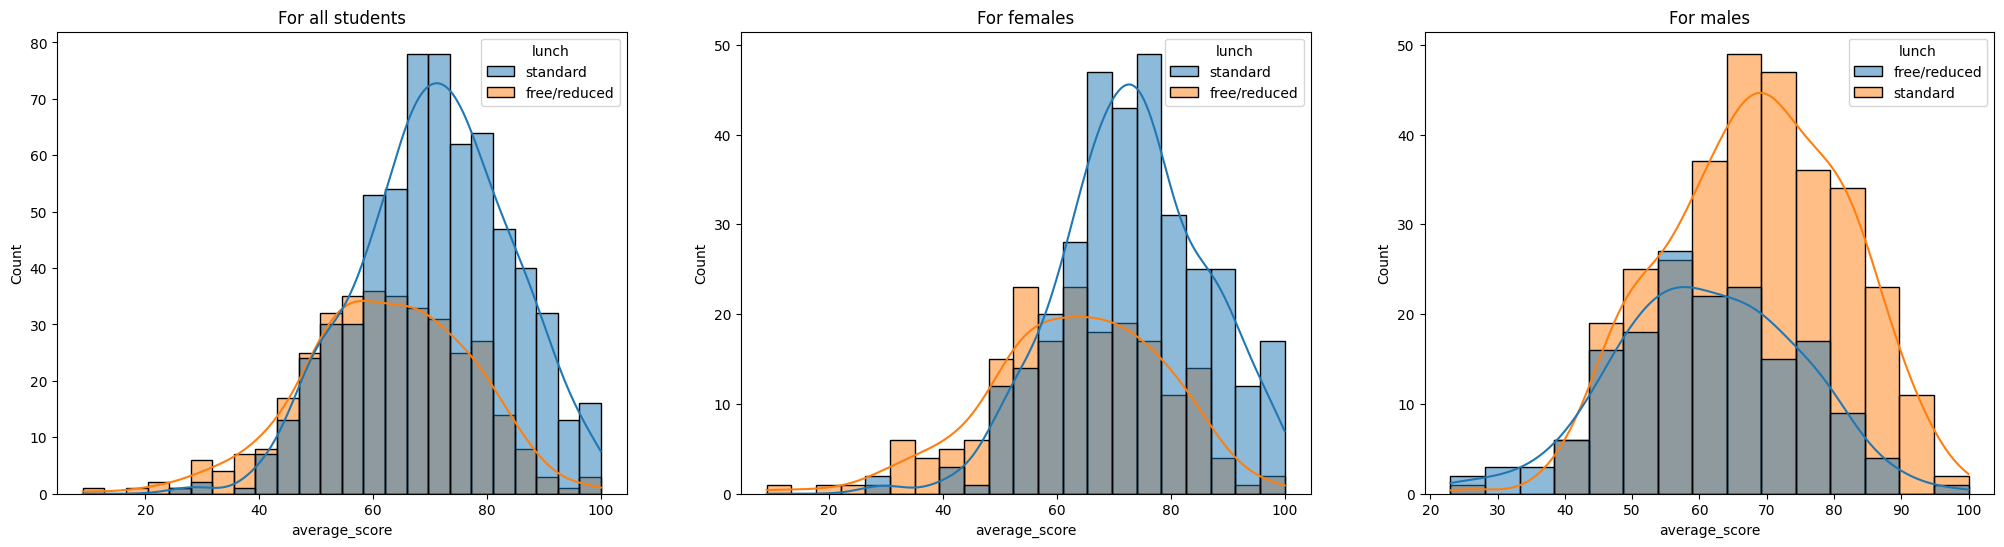

In [91]:
_, axs = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df,x='average_score',kde=True,hue='lunch', ax=axs[0])
axs[0].set_title('For all students')

sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch', ax=axs[1])
axs[1].set_title('For females')

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch', ax=axs[2])
axs[2].set_title('For males')


**Выводы**
- Стандартный обед помогает хорошо сдать экзамены.
- Стандартный обед помогает хорошо сдать экзамены, будь то мужчине или женщине.

Text(0.5, 1.0, 'For females')

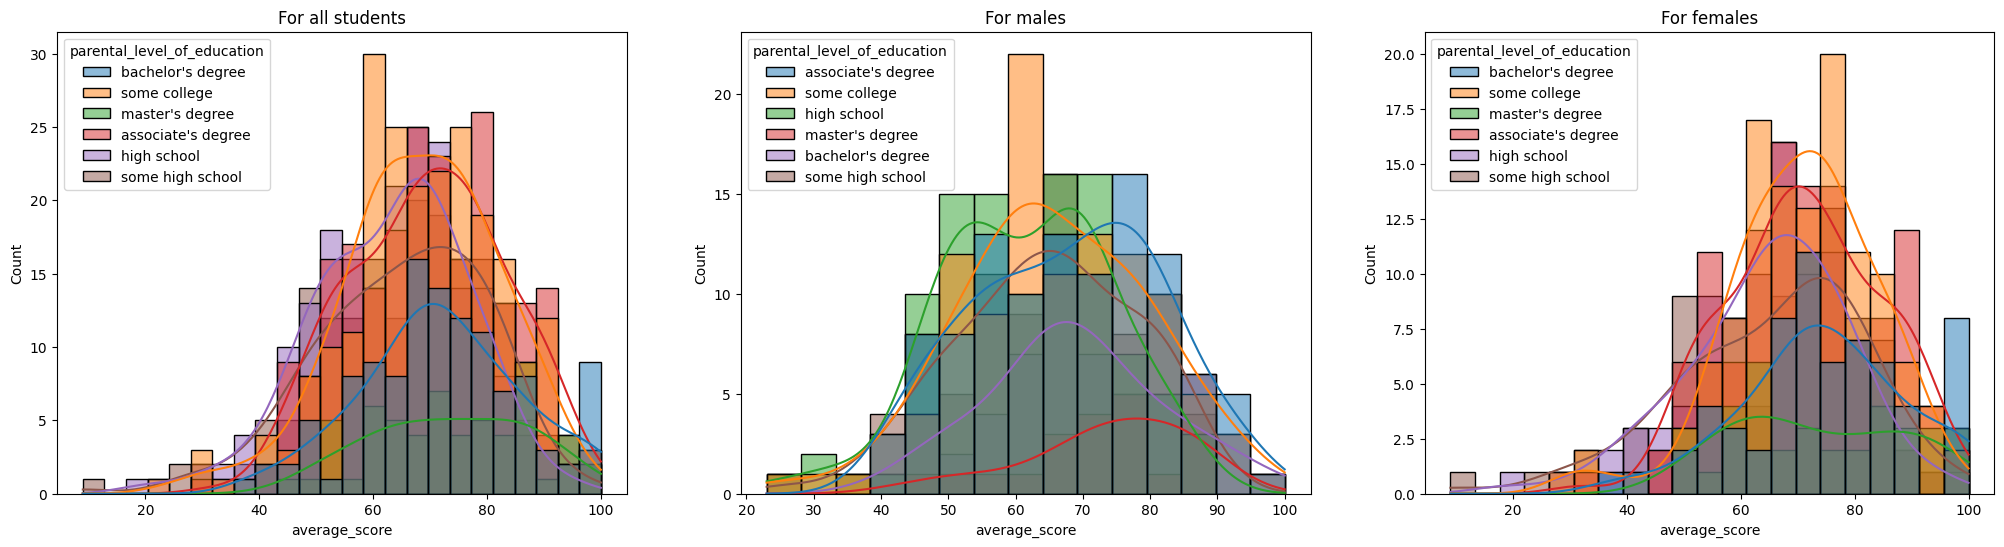

In [92]:
_, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('For all students')

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('For males')

sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('For females')


**Выводы**
- Студенты и студентки, у котроых родители имеют степерь магистра, зачастую имеют хорошие результаты
- В целом образование родителей не играет большую роль в успеваемости студентов

Text(0.5, 1.0, 'For females')

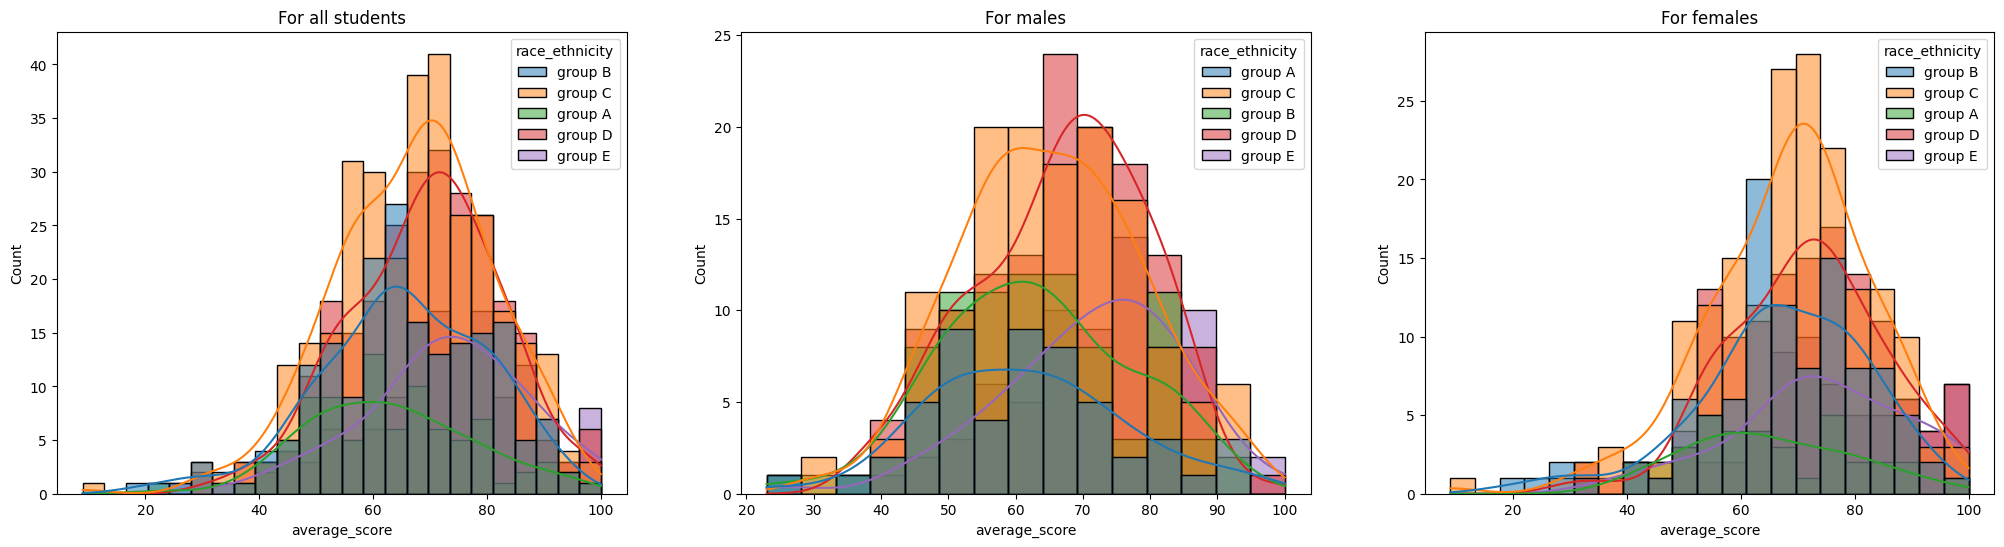

In [93]:
_, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity', ax=axs[0])
axs[0].set_title('For all students')

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity', ax=axs[1])
axs[1].set_title('For males')

sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity', ax=axs[2])
axs[2].set_title('For females')


**Выводы**
- Студенты-мужчины группы Е имеют результаты лучше, чем другие группы
- Студенты и студентки групп А и В имеют результаты худше, чем другие группы

### 4.2 Максимальный балл учащихся по всем трем предметам

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

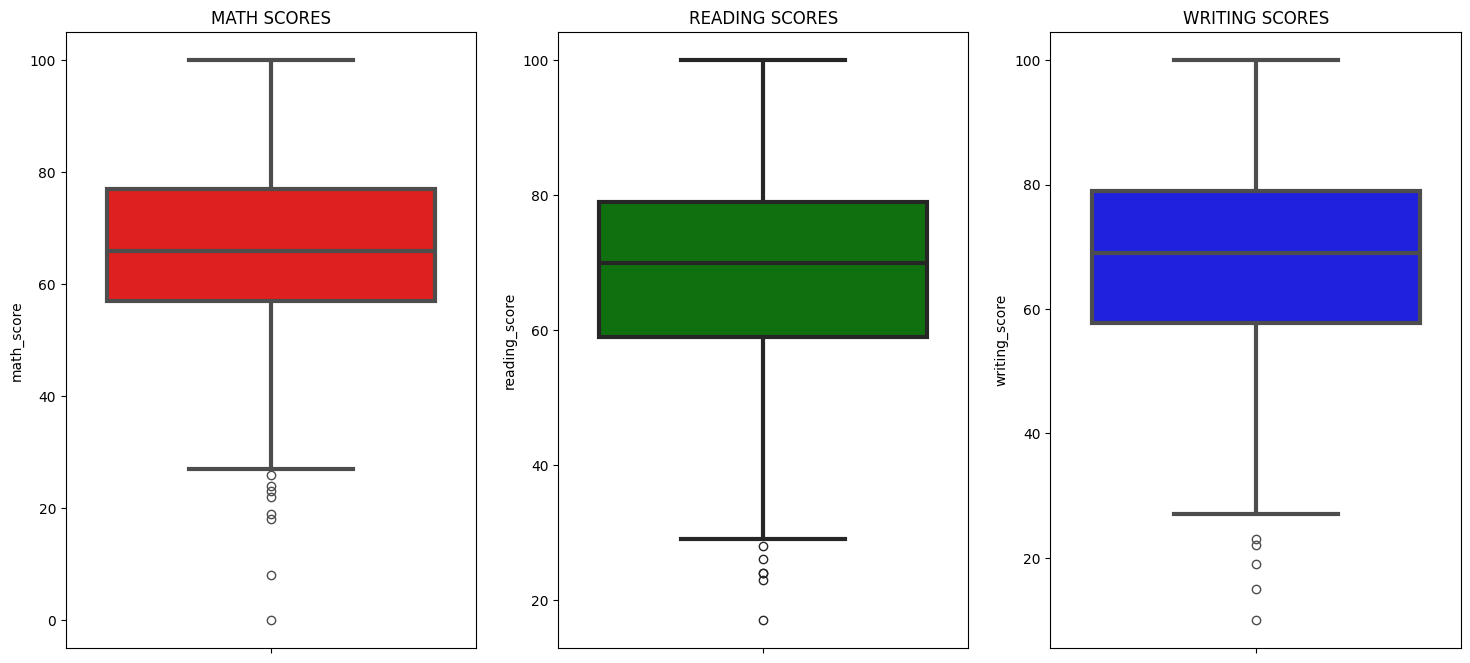

In [98]:
_, axs = plt.subplots(1,3,figsize=(18,8))
axs[0].set_title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3, ax=axs[0])

axs[1].set_title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3, ax=axs[1])

axs[2].set_title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3, ax=axs[2])


**Выводы**
- Больше всего низких результатов по чтению
- В целом медианное значение всех тестов одинаковое

### 4.3 Многомерный анализ с использованием круговой диаграммы

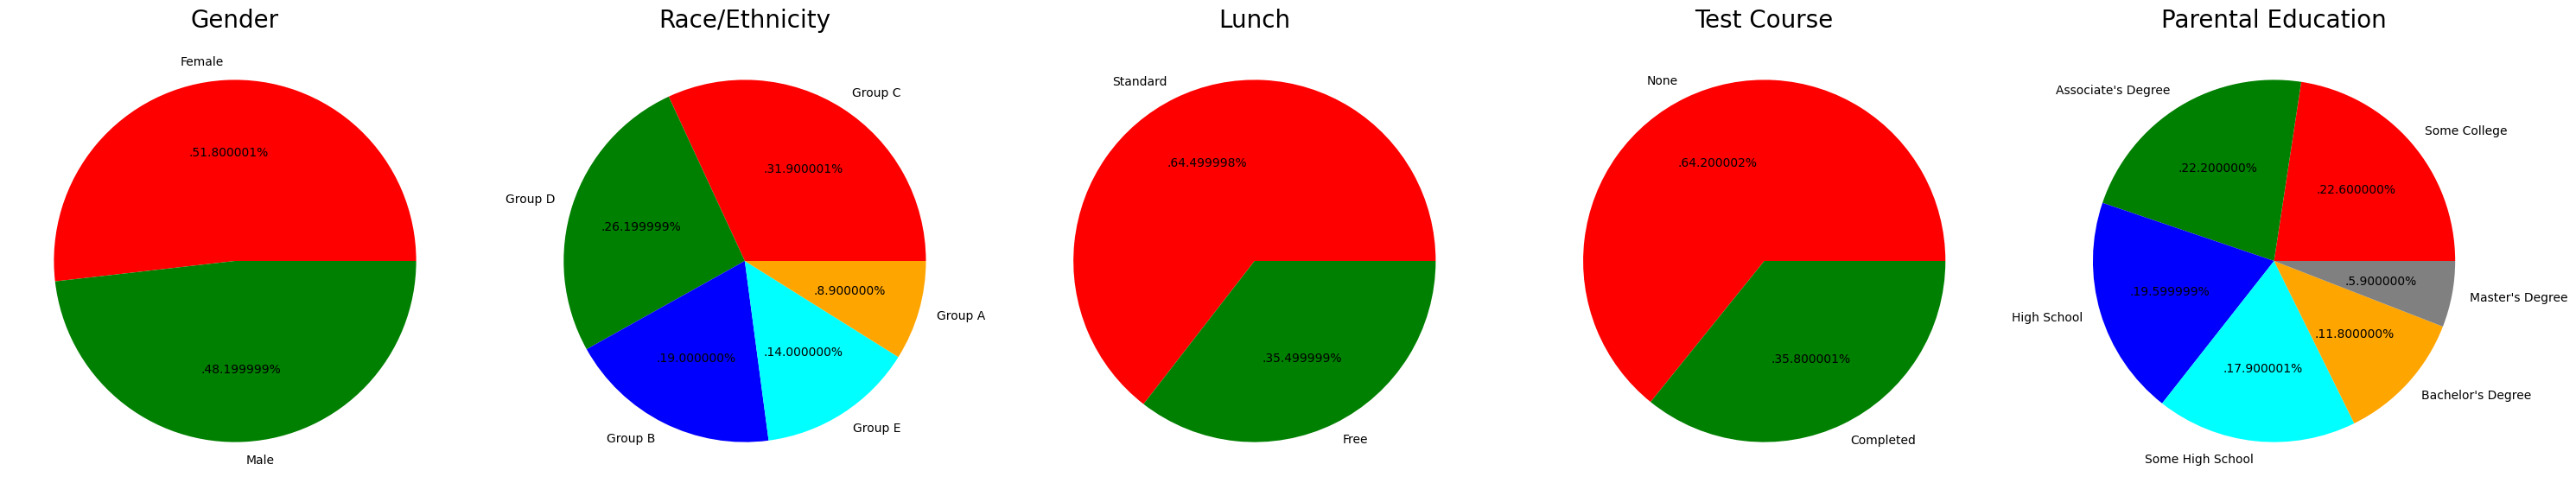

In [108]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Выводы**
- Количество студентов мужского и женского пола почти одинаково
- Количество студентов больше всего в группе С
- Количество студентов, которые едят стандартный обед, больше
- Количество студентов, которые не записались ни на один курс подготовки к тестированию, больше
- Число студентов, чьи родители получили образование "в каком-нибудь колледже" больше, за ними следует "Степень младшего специалиста".

### 4.4 Визуализация с учетом особенностей

#### 4.4.1 Колонка Gender

- Как распределяется гендер?
- Оказывает ли гендер какое-либо влияние на успеваемость учащихся?

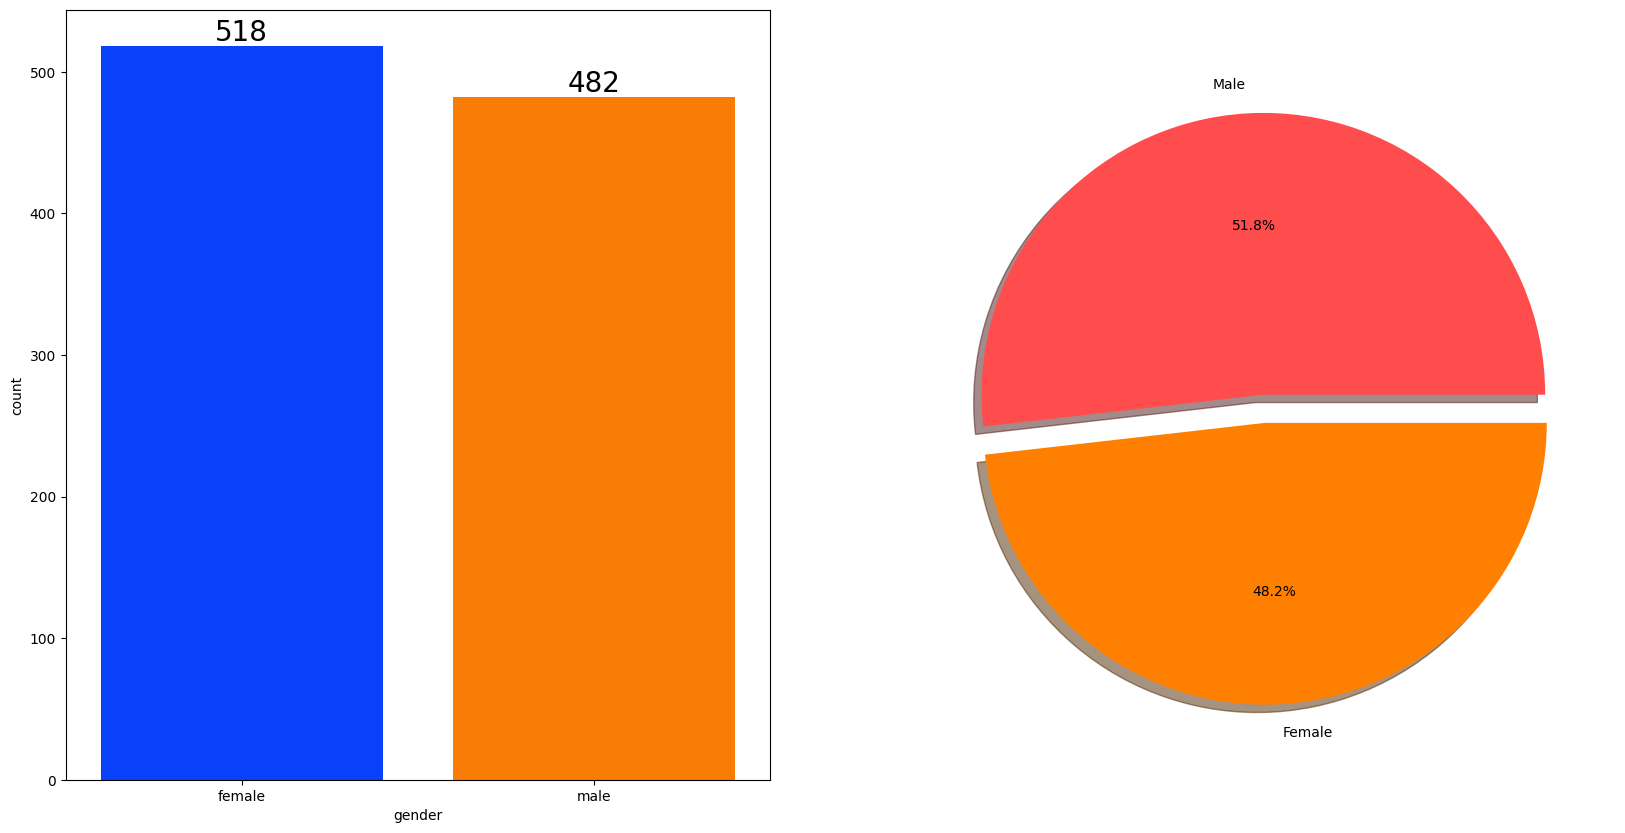

In [114]:
f,axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette ='bright', ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), 
        labels=['Male','Female'], 
        explode=[0,0.1], 
        autopct='%1.1f%%', 
        shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

**Вывод**
- Данные сбалансированы по гендерному признаку: число учащихся женского пола составляет 518 (48%), а число учащихся мужского пола - 482 (52%).

ДВУМЕРНЫЙ АНАЛИЗ (оказывает ли гендер какое-либо влияние на успеваемость учащихся? )

In [117]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


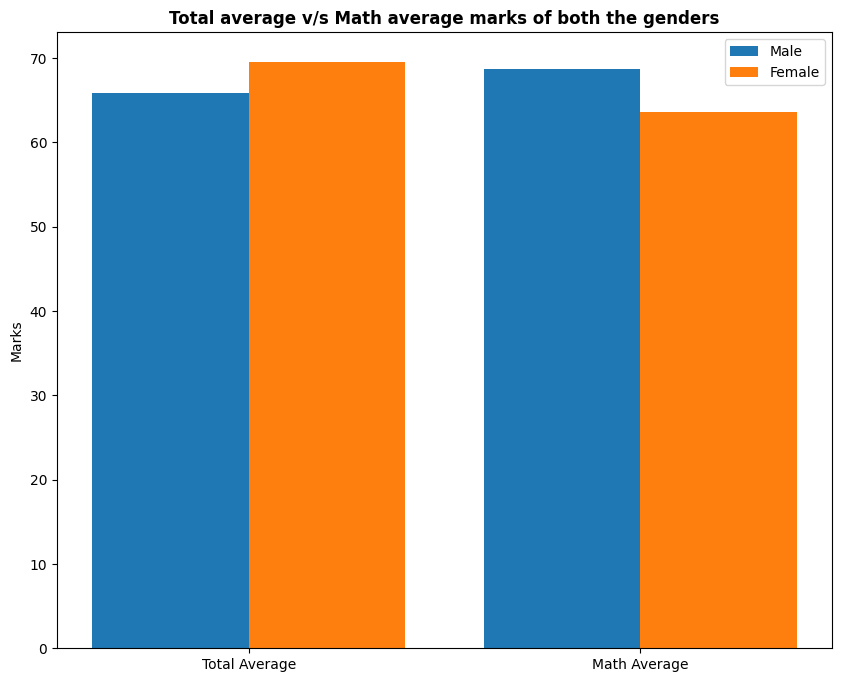

In [118]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Выводы**
- В среднем женщины имеют более высокий общий балл, чем мужчины.
- В то время как мужчины набрали более высокие баллы по математике.

#### 4.4.2 Колонка race_ethnicity

- Как происходит распределение по группам?
- Оказывает ли раса/этническая принадлежность какое-либо влияние на успеваемость учащихся?

ОДНОМЕРНЫЙ АНАЛИЗ (как происходит групповое распределение?)

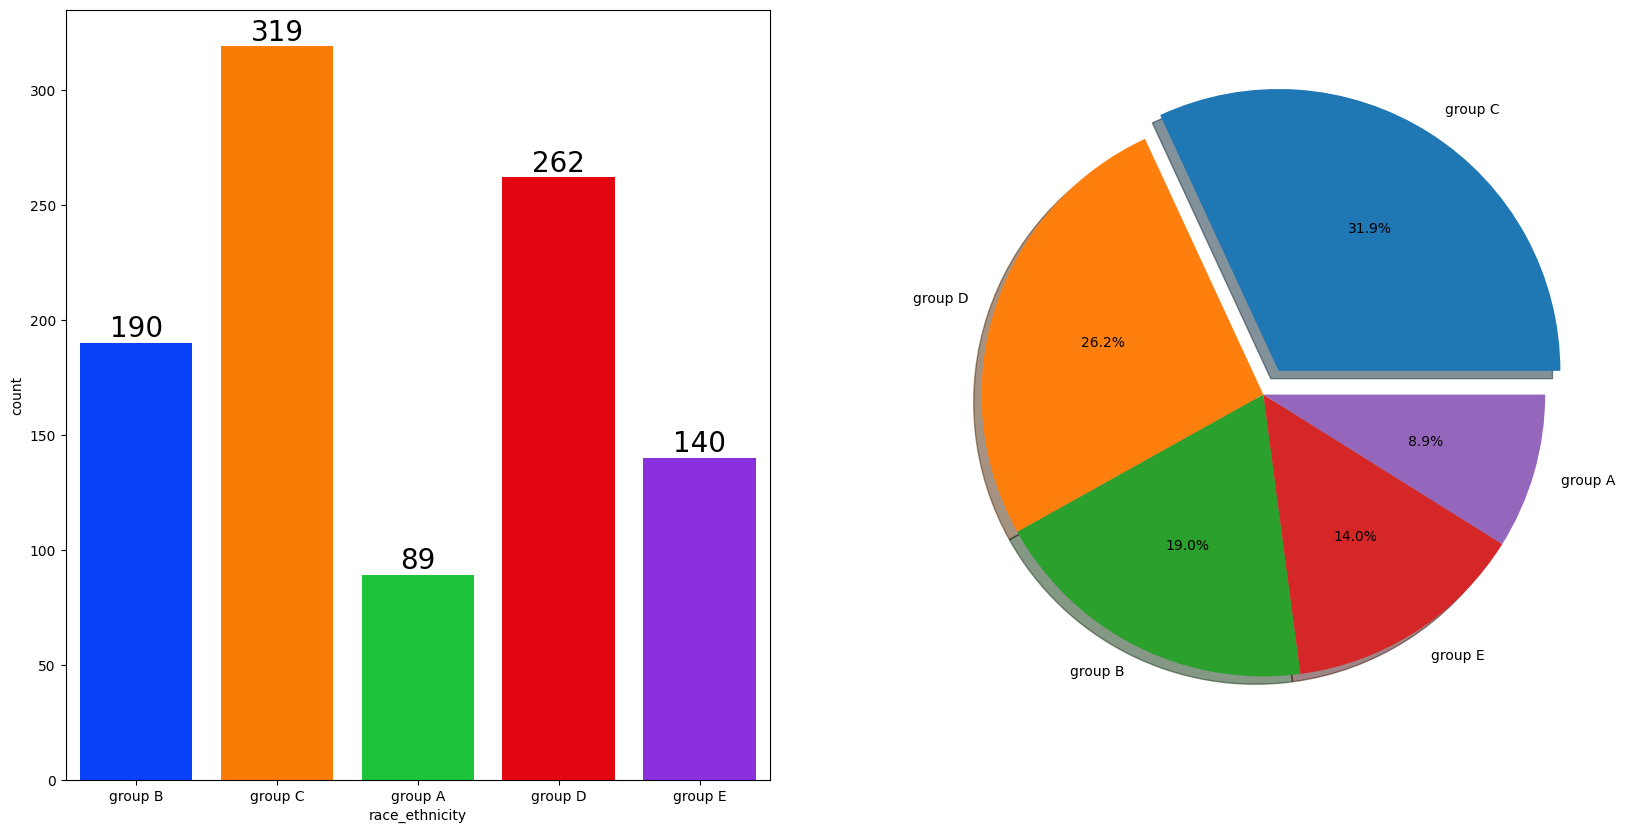

In [121]:
f, axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette = 'bright', ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(), 
        labels=df['race_ethnicity'].value_counts().index, 
        explode=[0.1,0,0,0,0], 
        autopct='%1.1f%%', 
        shadow=True)
plt.show() 

**Выводы**
- Большинство студентов принадлежат к группе C и группе D.
- Наименьшее количество студентов принадлежит к группе A.

ДВУМЕРНЫЙ АНАЛИЗ (оказывает ли раса/этническая принадлежность какое-либо влияние на успеваемость учащегося? )

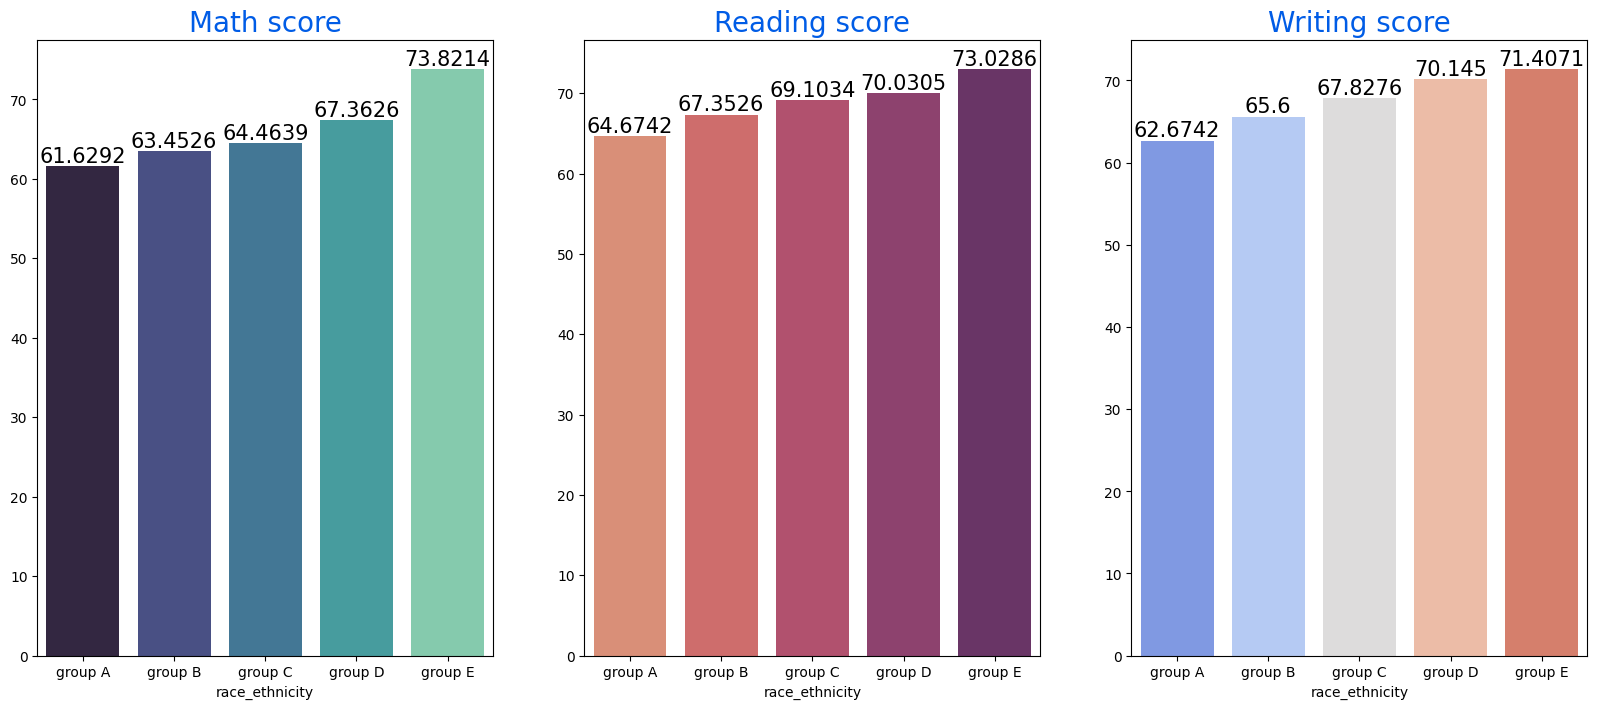

In [123]:
grouped_race_df = df.groupby('race_ethnicity')
f, axs = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=grouped_race_df['math_score'].mean().index,
            y=grouped_race_df['math_score'].mean().values,
            palette = 'mako',
            ax=axs[0])
axs[0].set_title('Math score', color='#005ce6', size=20)

for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)

sns.barplot(x=grouped_race_df['reading_score'].mean().index, 
            y=grouped_race_df['reading_score'].mean().values,
            palette = 'flare',ax=axs[1])
axs[1].set_title('Reading score', color='#005ce6', size=20)

for container in axs[1].containers:
    axs[1].bar_label(container, color='black', size=15)

sns.barplot(x=grouped_race_df['writing_score'].mean().index,
            y=grouped_race_df['writing_score'].mean().values, 
            palette = 'coolwarm', 
            ax=axs[2])
axs[2].set_title('Writing score', color='#005ce6', size=20)

for container in axs[2].containers:
    axs[2].bar_label(container, color='black', size=15)

**Выводы**
- Учащиеся группы Е набрали самые высокие оценки.
- Учащиеся группы А набрали самые низкие оценки.
- Учащиеся с более низким социально-экономическим статусом имеют более низкий средний балл по всем предметам курса

#### 4.4.3 Колонка parental_level_of_educatation

- Каково образование родителей учащегося?
- Оказывает ли родительское образование какое-либо влияние на успеваемость учащегося?

ОДНОФАКТОРНЫЙ АНАЛИЗ (Каково образование родителей учащегося? )

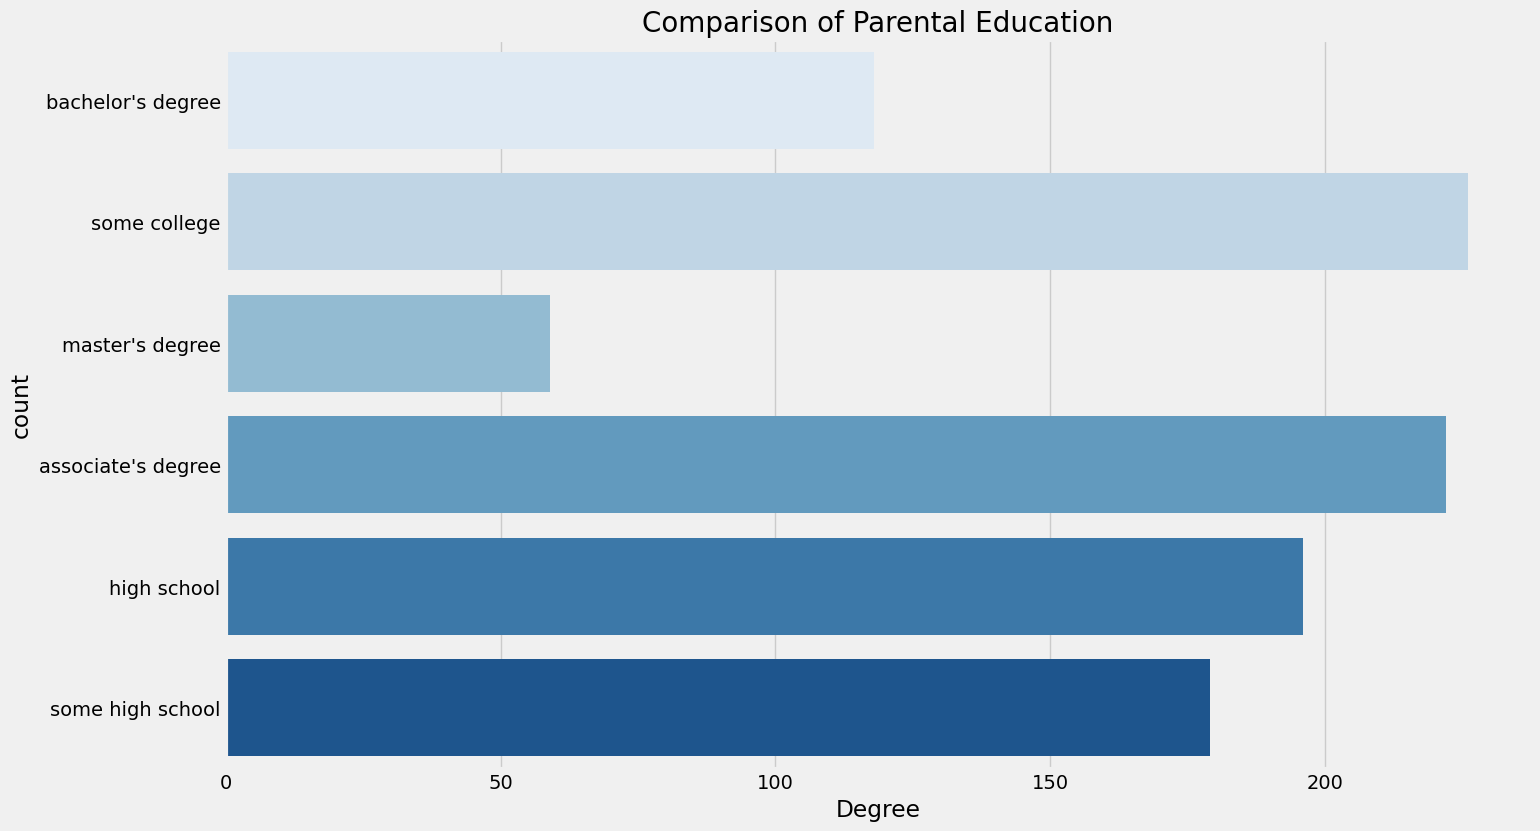

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Выводы**
- Наибольшее число родителей - выпускники какого-нибудь колледжа.

ДВУМЕРНЫЙ АНАЛИЗ (Оказывает ли родительское образование какое-либо влияние на успеваемость учащихся? )

In [130]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

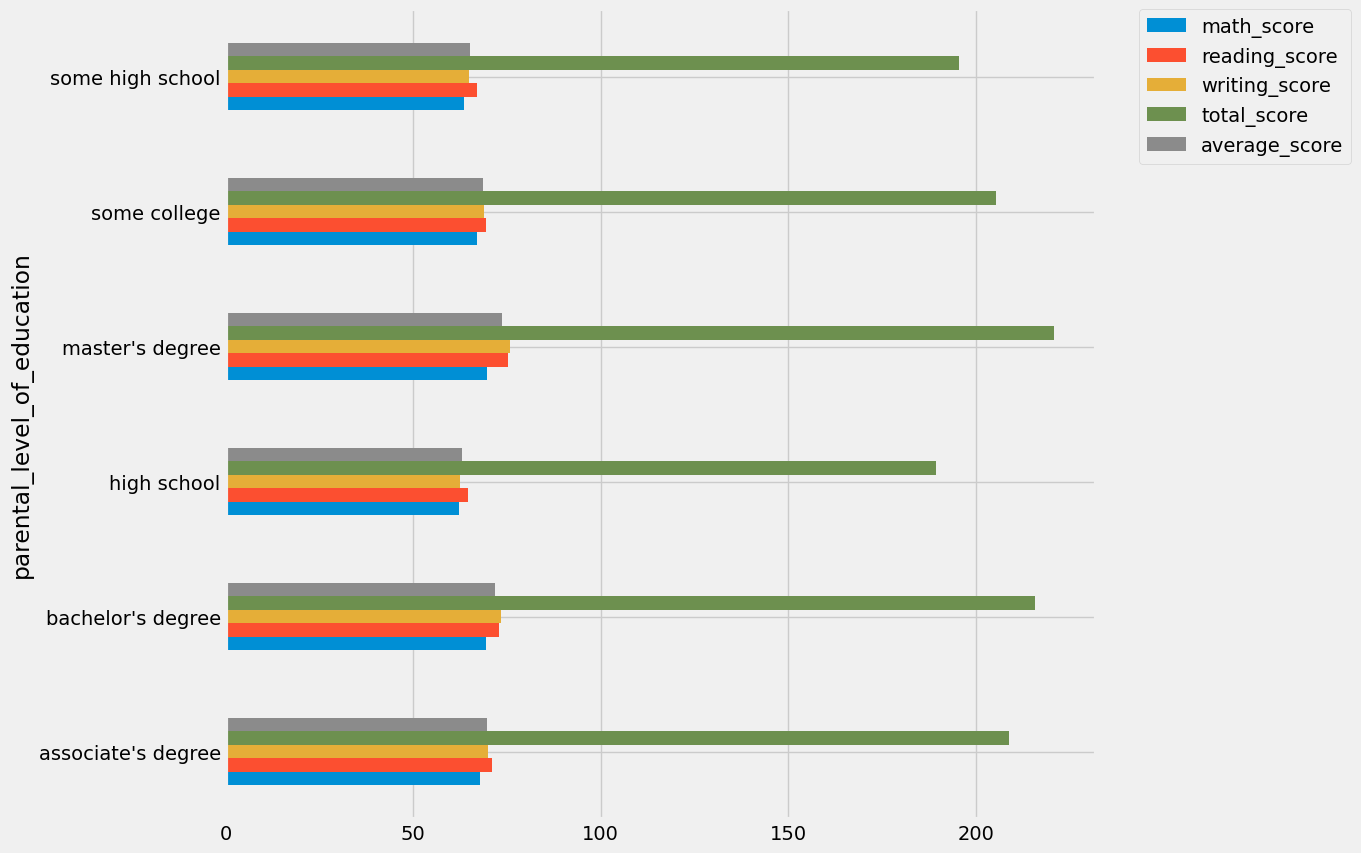

In [131]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score']].agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Выводы**  
- Баллы студентов, родители которых имеют образование на уровне магистра и бакалавра, выше, чем у других.

#### 4.4.4 Колонка Lunch

- Какой тип обеда наиболее распространен среди студентов?
- Как влияет тип обеда на результаты тестирования?

ОДНОФАКТОРНЫЙ АНАЛИЗ (какой тип обеда наиболее распространен среди студентов? )

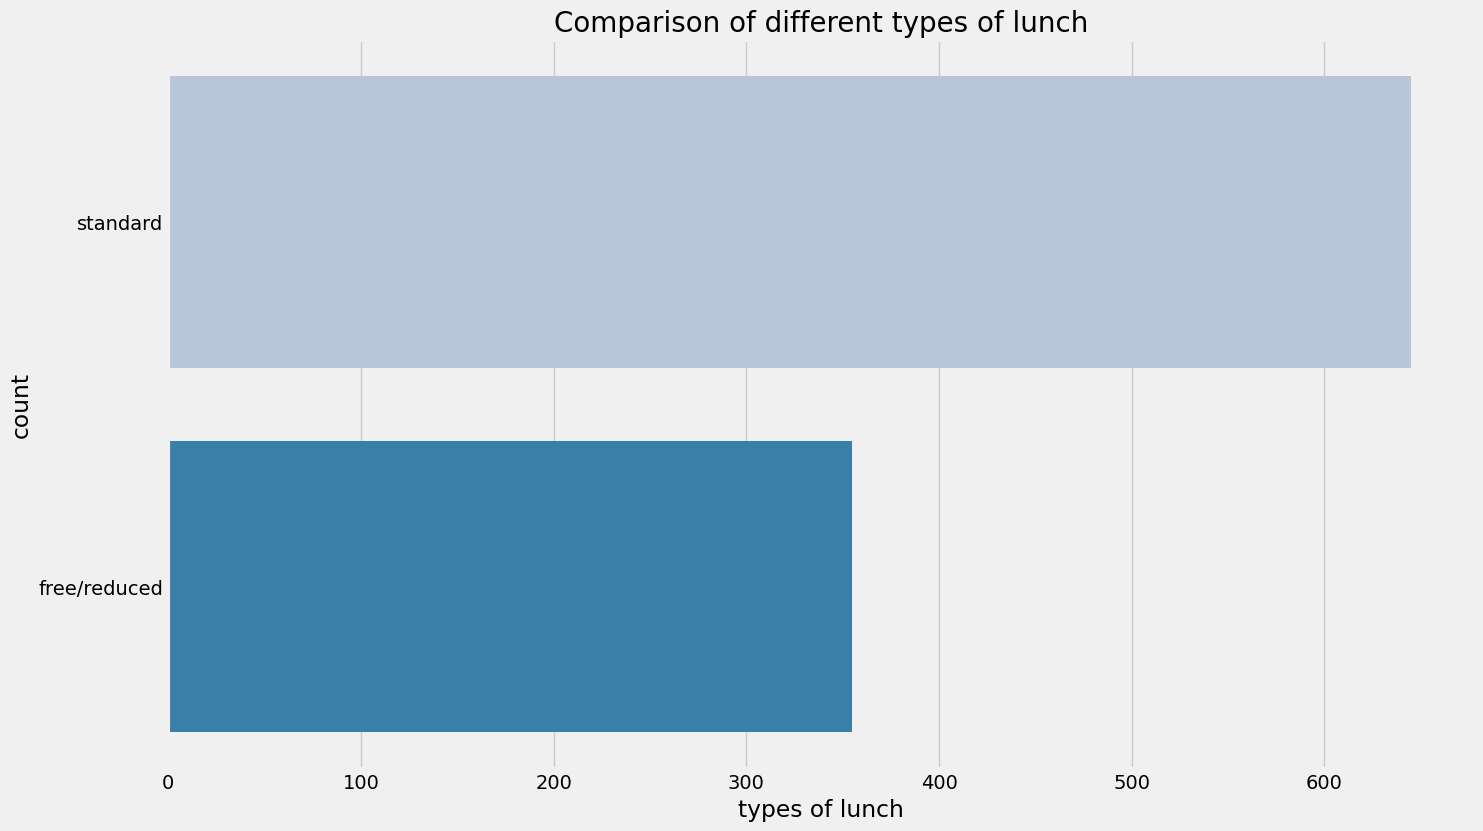

In [134]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Выводы**
- Учащиеся, которые пообедали стандартным обедом сдают тесты лучше, чем те, кто питался бесплатной едой

ДВУМЕРНЫЙ АНАЛИЗ (влияет ли тип питания во время обеда на успеваемость учащихся? )

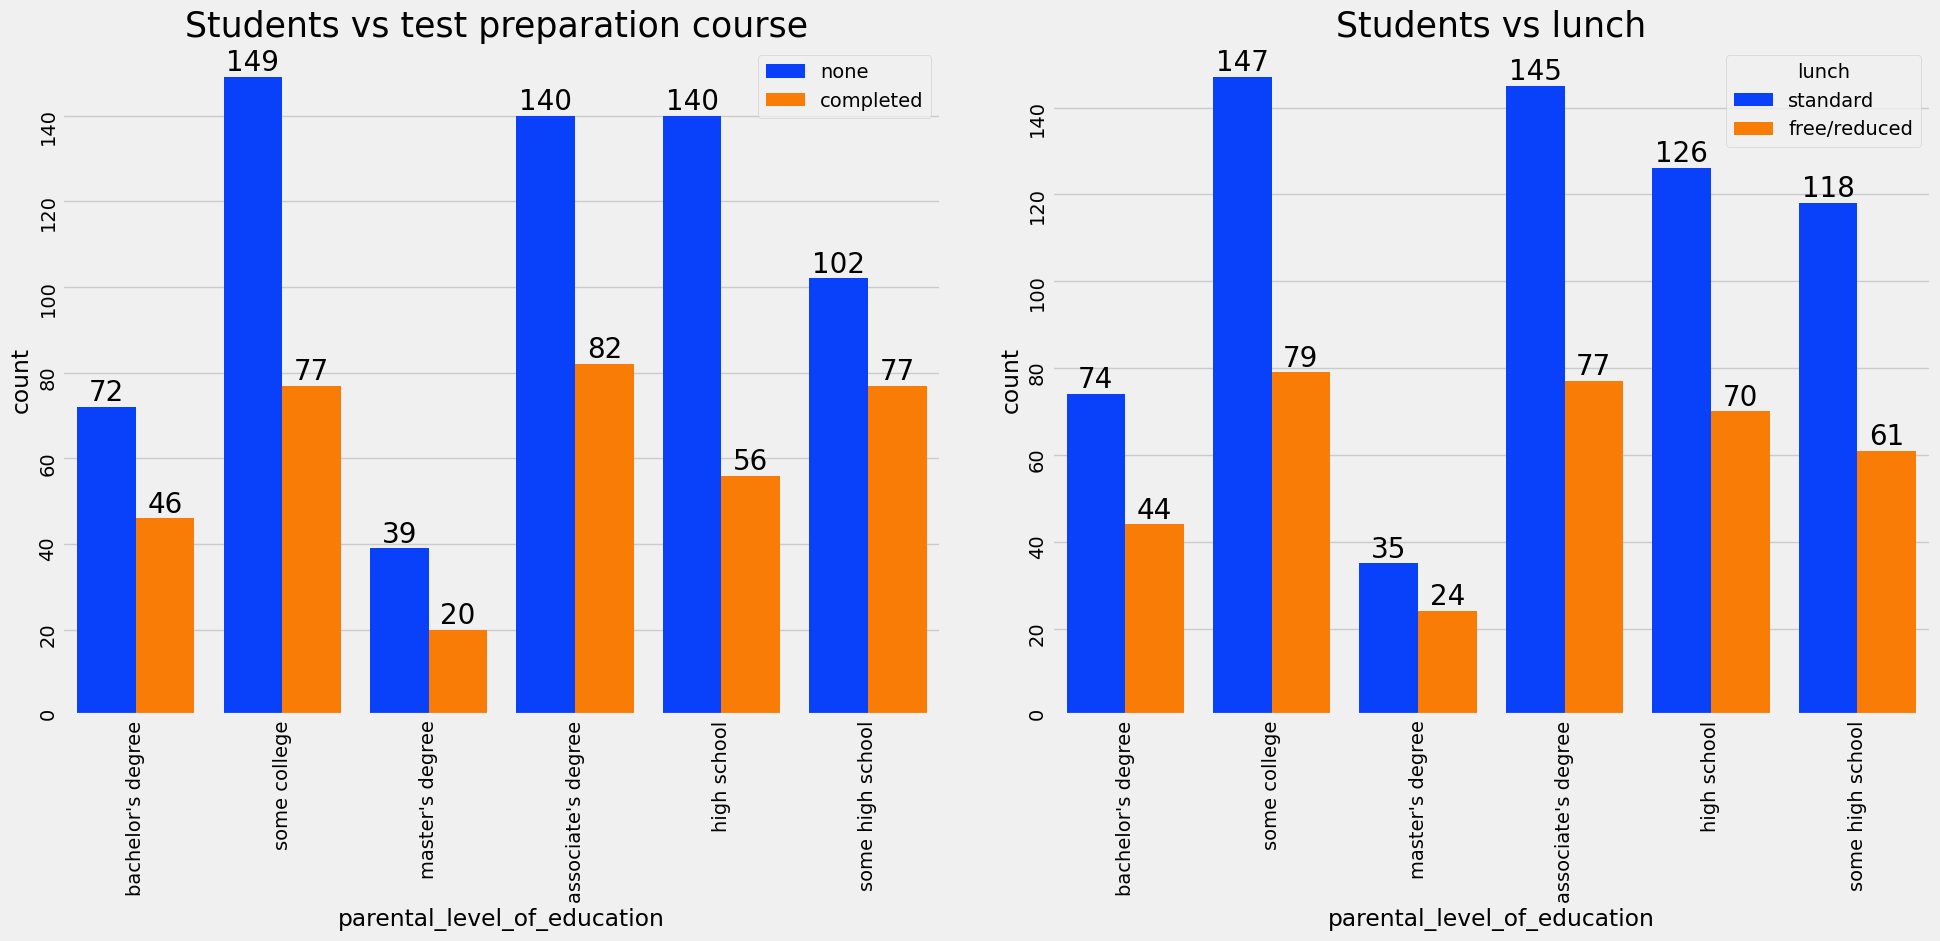

In [153]:
f, axs = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'], 
              data=df, 
              palette = 'bright',
              hue='test_preparation_course',
              saturation=0.95,ax=axs[0])
axs[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
    
sns.countplot(x=df['parental_level_of_education'], 
              data=df, 
              palette='bright', 
              hue='lunch', 
              saturation=0.95,
              ax=axs[1])
axs[1].set_title('Students vs lunch', color='black', size=25)
for container in axs[1].containers:
    axs[1].bar_label(container, color='black', size=20)   
plt.tight_layout()

axs[0].tick_params(labelrotation=90) 
axs[1].tick_params(labelrotation=90) 

axs[0].legend()

**Выводы**
- Студенты, получающие стандартный обед, как правило, успевают лучше, чем студенты, получавшие бесплатный / льготный обед

#### 4.4.5 Колонка test_preparation_course


- Оказывает ли курс подготовки к тестированию какое-либо влияние на успеваемость студента?

ДВУМЕРНЫЙ АНАЛИЗ (Оказывает ли курс подготовки к тестированию какое-либо влияние на успеваемость студента? )

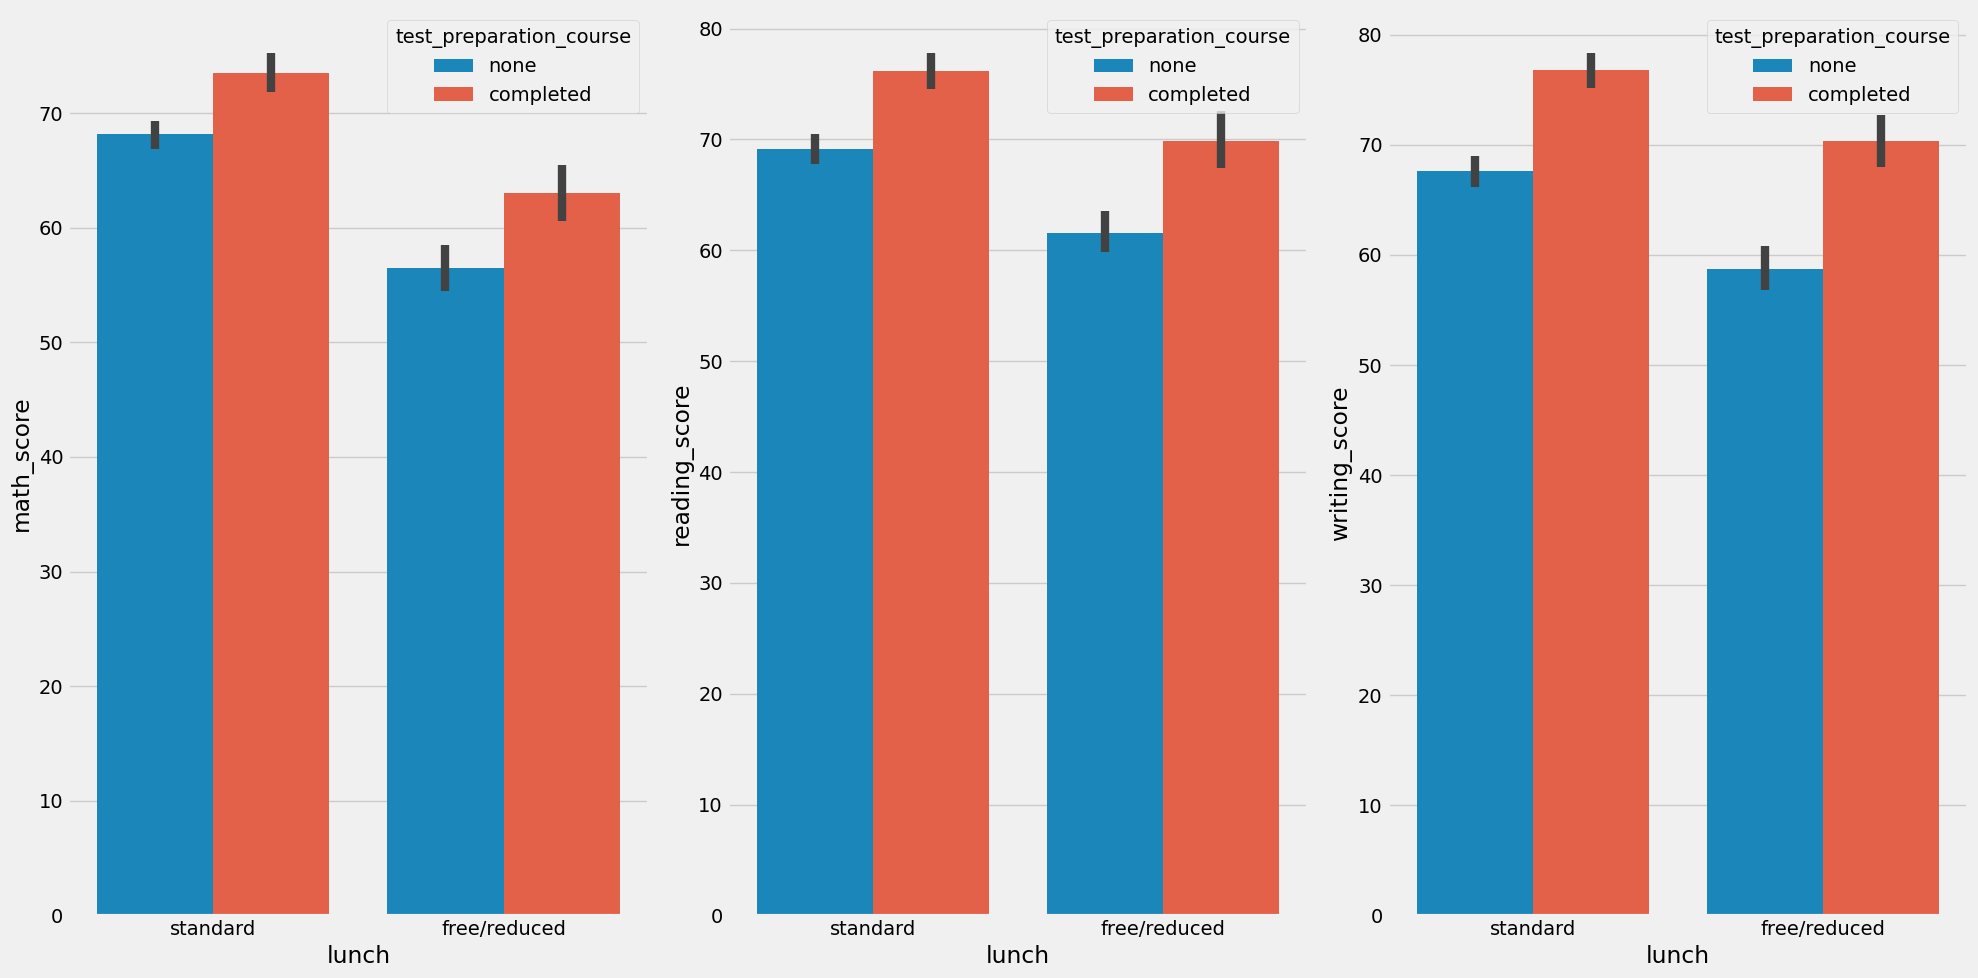

In [168]:
_, axs = plt.subplots(1,3, figsize=(20,10))
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'], ax=axs[0])
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'],  ax=axs[1])
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'],  ax=axs[2])
plt.tight_layout()

**Выводы**
- Студенты, прошедшие курс подготовки к тестированию, имеют более высокие баллы во всех трех категориях, чем те, кто не проходил этот курс

#### 4.4.6 Проверка выборосов

<Axes: ylabel='average_score'>

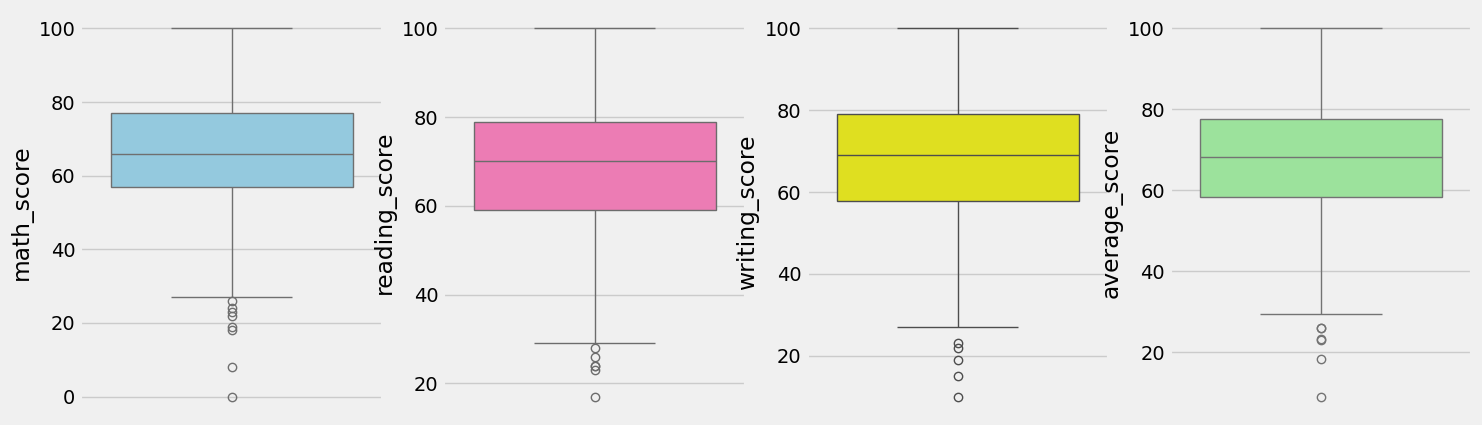

In [170]:
_, axs = plt.subplots(1,4,figsize=(16,5))
sns.boxplot(df['math_score'], color='skyblue', ax=axs[0])
sns.boxplot(df['reading_score'], color='hotpink', ax=axs[1])
sns.boxplot(df['writing_score'], color='yellow', ax=axs[2])
sns.boxplot(df['average_score'], color='lightgreen', ax=axs[3])


**Выводы**
- Как таковых сильных выбросов нет

#### 4.4.7 МНОГОМЕРНЫЙ АНАЛИЗ С ИСПОЛЬЗОВАНИЕМ ПАРНОЙ ДИАГРАММЫ

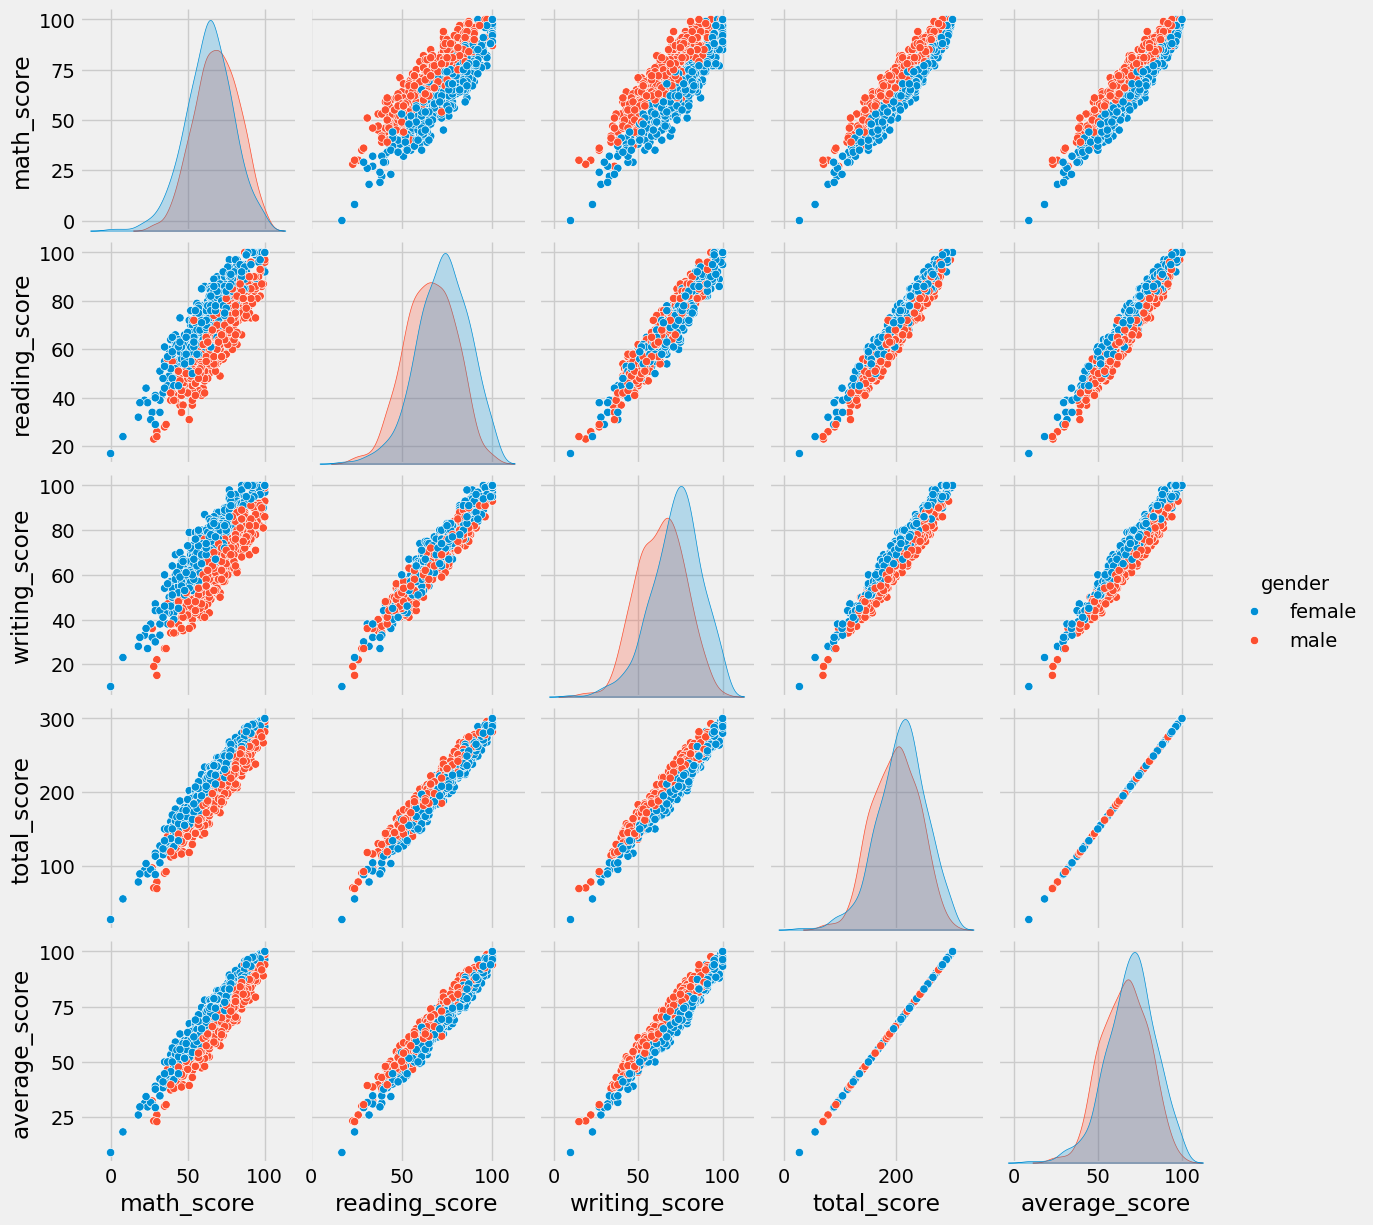

In [171]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Вывод**
- Из приведенного выше графика ясно, что все баллы линейно увеличиваются друг с другом.

## 5. Выводы
- Успеваемость учащихся связана с обедом, расой, образованием родителей
- Женщины лидируют по проценту проходных баллов, а также являются лучшими среди студентов
- Успеваемость учащихся не сильно связана с курсом подготовки к тестированию
- Полезно окончить подготовительный курс.